# Matrix Factorization


Matrix factorization is one of the bedrocks of modern data analysis, appearing in fields as diverse as recommendation systems, computer vision, and natural language processing. Its beauty lies in its simplicity: we take a complex matrix (e.g., a user-item interaction matrix in a recommendation system) and decompose it into smaller, interpretable matrices that reveal hidden patterns in the data.

The goal of this chapter is to explore **what matrix factorization is**, **why it works**, and **how it is applied** in a range of settings. We will also discuss **advanced variations** of the basic technique and **state-of-the-art methods** in matrix factorization.

## What Is Matrix Factorization?

Matrix factorization (MF) is the process of decomposing a large matrix into the product of two or more smaller matrices. Formally, for a matrix $ M $ of size $ m \times n $, we seek to express it as:

$$
M \approx U \times V^T
$$

Where:
- $ U $ is an $ m \times k $ matrix (e.g., representing latent user factors in a recommendation system).
- $ V $ is an $ n \times k $ matrix (e.g., representing latent item factors).
- $ k $ is the number of **latent features**—hidden dimensions that describe the interactions between the rows and columns of $ M $.

The goal is to find the matrices $ U $ and $ V $ that minimize the error in this approximation. The problem can be written as an optimization objective, such as minimizing the sum of squared differences between the observed entries in $ M $ and the predicted entries from $ U \times V^T $:

$$
\min_{U, V} \sum_{(i,j) \in \text{Observed}} \left( M_{ij} - U_i V_j^T \right)^2 + \lambda (\| U \|^2 + \| V \|^2)
$$

Where:
- $ (i,j) \in \text{Observed} $ means we only sum over the observed entries in $ M $.
- $ \lambda $ is the regularization parameter, preventing overfitting by discouraging extreme values in $ U $ and $ V $.

This formulation leads us to the **Alternating Least Squares (ALS)** and **Stochastic Gradient Descent (SGD)** algorithms, which we’ll explore in the next sections.

---

## Why Matrix Factorization Works

To understand why matrix factorization is effective, let’s look at a recommendation system. Imagine we have a matrix of user-item interactions where the rows represent users and the columns represent items (e.g., movies, products), and the entries of the matrix represent ratings or purchases. However, most entries are missing—most users haven’t rated most movies or bought most products.

This matrix is sparse, but **matrix factorization** helps uncover **latent patterns** in the data. These latent patterns could represent users' preferences (e.g., a user’s inclination towards action or romance movies) and items’ characteristics (e.g., a movie’s genre or popularity).

By factorizing this matrix, we can:
1. **Fill in the missing entries**: By predicting the unknown interactions (ratings, purchases), we can recommend new items to users.
2. **Identify hidden relationships**: The learned latent factors offer interpretable insights into the underlying structure of the data. For example, in movie recommendation, the factors might represent genre preferences or the intensity of emotional content in films.

## Understanding the Differences Between Matrix Factorization and Matrix Decomposition

Matrix factorization and matrix decomposition are fundamental concepts in linear algebra, machine learning, and AI, and although they share similarities, they serve different purposes in practice. While both techniques involve breaking down a matrix into simpler components, the nuances between these methods are important depending on their application. 

Below is a detailed comparison highlighting the specific differences between matrix factorization and matrix decomposition:

| **Feature**               | **Matrix Factorization**                                        | **Matrix Decomposition**                                    |
|---------------------------|---------------------------------------------------------------|-------------------------------------------------------------|
| **Conceptual Overview**    | Factorizes a matrix into a product of smaller matrices, often low-rank approximations. Typically involves optimization algorithms to find the best factorization based on data (e.g., user-item matrices in recommendation systems). | Decomposes a matrix into specific component matrices that represent properties like orthogonality, diagonal form, or triangular form. These are exact transformations revealing intrinsic matrix properties. |
| **Primary Goal**           | Approximates the original matrix for data-driven tasks, often for prediction or recommendation purposes. | Breaks a matrix into components to reveal theoretical properties or to simplify complex operations (e.g., solving linear systems). |
| **Common Use Cases**       | - Recommender systems (collaborative filtering) <br> - Dimensionality reduction in large datasets <br> - Topic modeling (e.g., NMF for text data) <br> - Feature extraction in latent factor models. | - Solving systems of linear equations <br> - Principal component analysis (PCA) <br> - Eigenvalue problems <br> - Signal processing (SVD) <br> - Numerical analysis for computational efficiency. |
| **Key Techniques**         | - **Non-negative Matrix Factorization (NMF)**: Factorizes a matrix into two non-negative matrices. <br> - **Latent Factor Models**: Used in collaborative filtering to find latent user/item features. <br> - **Alternating Least Squares (ALS)**: Optimizes matrix factorization for large datasets. | - **Singular Value Decomposition (SVD)**: Decomposes a matrix into three matrices (U, Σ, V). <br> - **LU Decomposition**: Splits a matrix into lower and upper triangular matrices. <br> - **QR Decomposition**: Factorizes a matrix into an orthogonal and an upper triangular matrix. <br> - **Eigenvalue Decomposition**: Decomposes a matrix into eigenvectors and eigenvalues. |
| **Output**                 | Produces an **approximation** of the original matrix, typically with lower rank, enabling data compression or predictions (e.g., approximating missing ratings in a user-item matrix). | Produces **exact** decompositions, often used to expose structural properties like eigenvalues, orthogonality, or diagonal form. Useful in solving linear algebra problems. |
| **Mathematical Nature**    | Relies on **optimization algorithms** (e.g., stochastic gradient descent, alternating least squares) to approximate the factorization. Often geared toward approximating large datasets for practical applications. | Involves **exact algebraic transformations**, focusing on mathematical properties of the matrix. The decomposition results are exact and deterministic. |
| **Common Applications**    | - Recommender systems <br> - Feature extraction <br> - Collaborative filtering <br> - Dimensionality reduction for large-scale data | - Principal component analysis (PCA) <br> - Linear regression (QR decomposition for solving least squares) <br> - Eigenvalue problems in physics and engineering <br> - Signal and image processing (e.g., SVD for image compression) |
| **Optimization or Exact**  | Typically involves **optimization**, meaning factorization is an approximation (especially in practical applications like AI). <br> For example, collaborative filtering often aims for low-rank factorization based on user and item interactions. | Decomposition is **exact** (e.g., SVD, LU), and the breakdown is deterministic, reflecting precise mathematical properties. |
| **Example Algorithms**     | - **Matrix Factorization in Recommender Systems**: Factorizes user-item matrices to predict ratings or interactions. <br> - **Non-negative Matrix Factorization (NMF)**: Used in text mining, where matrices are decomposed into non-negative factors, often for topic discovery. <br> - **Latent Factor Models**: Used for uncovering hidden patterns in data. | - **Singular Value Decomposition (SVD)**: Decomposes a matrix into three matrices to reveal its rank and underlying structure. <br> - **Eigenvalue Decomposition**: Used to understand the spectral properties of a matrix (e.g., finding the directions of maximum variance). <br> - **LU Decomposition**: Decomposes a matrix for solving systems of equations by breaking it into triangular components. |
| **Real-world Example**     | A recommender system factors a user-item rating matrix into a user-feature matrix and an item-feature matrix to predict missing ratings (e.g., Netflix movie recommendations). | Eigenvalue decomposition is used to determine the stability of dynamic systems, or SVD is used in PCA for dimensionality reduction and signal compression. |
| **Focus on Dimensionality**| Typically focused on reducing dimensionality by approximating the original matrix with smaller matrices. Low-rank matrix approximations allow for feature compression in large datasets. | While matrix decomposition can be used for dimensionality reduction (e.g., PCA using SVD), its primary focus is not on approximation but on deriving exact mathematical properties. |


## Understanding the Math Behind Matrix Factorization and Matrix Decomposition

Matrix factorization and matrix decomposition share some mathematical foundations but differ in their goals and the specific mathematical techniques used. Both involve breaking down a matrix into simpler components, but the way they approach this process varies significantly.

Matrix factorization often involves **approximation** and uses **optimization techniques** to minimize reconstruction error. On the other hand, matrix decomposition is generally an **exact transformation** where the matrix is broken down into specific components that represent properties like orthogonality, diagonal structure, or eigenvalues.

### 1. General Mathematical Framework
Both methods aim to represent a matrix $ A $ in terms of simpler matrices:

$$
A = B \times C
$$

However, matrix factorization focuses on **approximation**, while matrix decomposition aims for **exact** algebraic transformations.

### 2. Matrix Factorization: Optimization and Approximation
The math behind matrix factorization involves **optimization** to approximate the original matrix. Typically, the objective is to minimize the difference between the original matrix $ A $ and the product of matrices $ B $ and $ C $:

$$
A \approx B \times C
$$

The goal is to solve:

$$
\min_{B, C} \| A - B \times C \|^2
$$

This involves iterative algorithms like **stochastic gradient descent (SGD)** or **alternating least squares (ALS)**. Factorization methods often include additional constraints, such as non-negativity in **Non-negative Matrix Factorization (NMF)**.

#### Example: Non-negative Matrix Factorization (NMF)
In NMF, the goal is to factorize a matrix into non-negative matrices by minimizing reconstruction error:

$$
\min_{B, C \geq 0} \| A - B \times C \|^2
$$

This involves solving a constrained optimization problem.

### 3. Matrix Decomposition: Exact Algebraic Methods
Matrix decomposition uses **exact algebraic transformations** without the need for optimization. The idea is to decompose a matrix into components that reveal its structural properties. A key example is **Singular Value Decomposition (SVD)**, which decomposes a matrix $ A $ as:

$$
A = U \Sigma V^T
$$

where $ U $ and $ V $ are orthogonal matrices, and $ \Sigma $ is a diagonal matrix containing singular values. Decomposition methods like **Eigenvalue Decomposition** also involve solving characteristic equations.

#### Example: Eigenvalue Decomposition
Eigenvalue decomposition breaks down a square matrix $ A $ into:

$$
A = V \Lambda V^{-1}
$$

where $ \Lambda $ is a diagonal matrix of eigenvalues, and $ V $ is the matrix of eigenvectors. This decomposition is **exact** and based on solving the equation:

$$
A v = \lambda v
$$

### 4. Key Mathematical Differences

| **Aspect**                  | **Matrix Factorization**                                | **Matrix Decomposition**                                |
|-----------------------------|---------------------------------------------------------|---------------------------------------------------------|
| **Mathematical Goal**        | Approximate a matrix as a product of smaller matrices.  | Exactly decompose a matrix into specific components.     |
| **Process**                  | Iterative optimization (minimizing a loss function).    | Algebraic transformations (solving characteristic equations, performing matrix operations). |
| **Typical Equation**         | $ A \approx B \times C $ (approximation)             | $ A = U \Sigma V^T $, $ A = V \Lambda V^{-1} $ (exact) |
| **Solving Method**           | Involves optimization techniques like gradient descent, alternating least squares, or other iterative methods. | Solved via exact algebraic methods like solving for eigenvalues, or applying orthogonal transformations. |
| **Error Handling**           | Focus on minimizing the reconstruction error $ \| A - B \times C \|^2 $. The output matrices are not exact but aim to minimize the difference. | No approximation error. The decomposed matrices are exact representations of the original matrix. |
| **Example Techniques**       | Stochastic Gradient Descent (SGD), Alternating Least Squares (ALS), Non-negative Matrix Factorization (NMF). | Singular Value Decomposition (SVD), Eigenvalue Decomposition, QR Decomposition, LU Decomposition. |

### 5. Similarities
- Both methods involve breaking down a matrix into simpler components.
- Both can reduce dimensionality, but matrix factorization typically does so through approximation, while matrix decomposition exposes exact structural properties.
- Some decomposition methods, like **SVD**, are also used in matrix factorization to approximate low-rank matrices.

### Conclusion
- **Matrix Factorization** focuses on approximation using optimization algorithms (e.g., minimizing reconstruction error) to achieve a product of simpler matrices.
- **Matrix Decomposition** focuses on exact transformations that reveal the intrinsic properties of a matrix (e.g., eigenvalues, singular values, or triangular forms).

While both methods are related, the underlying mathematical approaches differ, with factorization relying on optimization and decomposition relying on exact algebraic transformations.


## Why Can SVD Be Used in Both Matrix Decomposition and Matrix Factorization?

The **Singular Value Decomposition (SVD)** method can be used in both **matrix decomposition** and **matrix factorization** because it provides a precise mathematical breakdown of a matrix that is both useful for **exact transformations** (decomposition) and for **approximation tasks** (factorization). However, the way SVD is applied in each context differs in purpose and emphasis.

### 1. SVD as Matrix Decomposition
In matrix decomposition, SVD is used as an **exact algebraic tool** to decompose any matrix $ A $ (rectangular or square) into three component matrices:

$$
A = U \Sigma V^T
$$

Where:
- $ U $ is an orthogonal matrix containing the **left singular vectors**.
- $ \Sigma $ is a diagonal matrix containing the **singular values** of $ A $, which represent the "strength" of each dimension.
- $ V^T $ is the transpose of an orthogonal matrix containing the **right singular vectors**.

This decomposition is exact and exposes several key properties of the matrix:
- **Rank**: The number of non-zero singular values.
- **Energy**: The importance of each singular value, which helps identify how much of the original matrix is captured by each dimension.
- **Orthogonality**: The vectors in $ U $ and $ V $ form orthonormal bases, simplifying calculations like projections and transformations.

SVD, in this case, is used to understand the **structural properties** of the matrix, without approximations or optimization.

### 2. SVD as Matrix Factorization
In matrix factorization, SVD is used to **approximate** a matrix, often with a focus on **low-rank approximations**. This is particularly useful in applications like **dimensionality reduction** and **recommender systems**, where the goal is to approximate a large matrix with fewer dimensions.

Here’s how SVD works in matrix factorization:
- Instead of keeping all the singular values from $ \Sigma $, you can approximate the original matrix $ A $ by **truncating** the singular value matrix $ \Sigma $ and reducing the rank.
- You select the top $ k $ largest singular values, reducing the matrix dimensions:

$$
A \approx U_k \Sigma_k V_k^T
$$

Where $ U_k $, $ \Sigma_k $, and $ V_k^T $ retain only the first $ k $ singular values and corresponding vectors. The matrix $ A $ is now approximated by matrices of much smaller dimensions (rank $ k $), significantly reducing storage and computation requirements, while still retaining most of the important information from the original matrix.

#### Example: SVD for Recommender Systems
In recommender systems, the user-item interaction matrix (which may have missing values) can be factorized using SVD. The truncated version of SVD helps discover **latent factors** (e.g., preferences or patterns) that approximate user-item interactions.

- **Low-rank Approximation**: Instead of using all the singular values, you use only the most significant ones to represent user preferences and item features.
- **Prediction**: With the factorized matrices, you can predict missing entries in the matrix, such as a user's potential rating for a movie.

### Key Difference: Exact vs. Approximation

| **Aspect**               | **SVD in Matrix Decomposition**                               | **SVD in Matrix Factorization**                              |
|--------------------------|---------------------------------------------------------------|-------------------------------------------------------------|
| **Purpose**               | To exactly decompose a matrix into its singular vectors and singular values, revealing its full structure. | To approximate a matrix by reducing its rank, keeping only the most significant singular values, for tasks like dimensionality reduction or collaborative filtering. |
| **Output**                | $ A = U \Sigma V^T $, with no loss of information.           | $ A \approx U_k \Sigma_k V_k^T $, with some loss of information, but focusing on the most important dimensions. |
| **Application**           | Used in exact computations like PCA, signal processing, and solving systems of linear equations. | Used in data-driven applications like recommender systems, where the goal is to approximate a large matrix with fewer dimensions (low-rank factorization). |
| **Dimensionality**        | Retains all dimensions (no truncation).                       | Truncates dimensions, keeping only the top $ k $ singular values. |
| **Use of Singular Values**| All singular values are kept, revealing the matrix's full rank and structure. | Only the top singular values are kept, simplifying the matrix while preserving the most important features. |

### Why Can SVD Be Used in Both?
- **Theoretical Flexibility**: SVD is fundamentally a decomposition method, but it can also serve as an efficient tool for factorization. By truncating the singular value matrix, you switch from an exact decomposition to an approximate factorization.
- **Low-rank Property**: In many practical applications (like machine learning), matrices can be well-approximated by low-rank versions. SVD provides an optimal way to reduce the rank while preserving as much of the important structure of the original matrix as possible.
- **Applications in Data Science**: In data science, exactness is often less important than finding patterns, reducing dimensionality, or making predictions. SVD, as a factorization tool, can approximate a matrix and uncover latent structures (e.g., user preferences in recommender systems) without needing the full exact decomposition.

### Conclusion
SVD is versatile because it serves both purposes:
- In **matrix decomposition**, it provides an exact breakdown of the matrix into orthogonal components.
- In **matrix factorization**, it allows for low-rank approximations by truncating the singular value matrix, which is key in data-driven applications like recommender systems and dimensionality reduction.

Thus, the mathematical properties of SVD make it powerful for both exact matrix analysis and approximate data-driven tasks.


---

## Algorithms for Matrix Factorization

### Alternating Least Squares (ALS)

**Alternating Least Squares (ALS)** is one of the most popular algorithms for matrix factorization, especially in large-scale recommendation systems. It alternates between optimizing for the user matrix $ U $ and the item matrix $ V $, holding one constant while solving for the other.

#### ALS Algorithm:
1. Initialize matrices $ U $ and $ V $ randomly.
2. **Fix $ V $** and solve for $ U $ by minimizing the objective function:
   $$
   U = \arg \min_U \sum_{i,j} \left( M_{ij} - U_i V_j^T \right)^2 + \lambda \| U \|^2
   $$
   This is a standard least-squares problem.
3. **Fix $ U $** and solve for $ V $ by minimizing the objective function:
   $$
   V = \arg \min_V \sum_{i,j} \left( M_{ij} - U_i V_j^T \right)^2 + \lambda \| V \|^2
   $$
4. Repeat steps 2 and 3 until convergence.

#### Why ALS Works:
- ALS leverages the fact that, when one of the matrices (either $ U $ or $ V $) is fixed, the optimization problem becomes a **linear least-squares problem**, which has an efficient solution.
- Alternating between optimizing $ U $ and $ V $ guarantees that the objective function will decrease at every step, though it may only converge to a **local minimum**.

ALS is particularly efficient when implemented in distributed computing environments (e.g., Spark’s ALS implementation), allowing it to scale to massive datasets with billions of entries.

### Stochastic Gradient Descent (SGD)

While ALS is effective for large-scale matrix factorization, **Stochastic Gradient Descent (SGD)** offers a more flexible and often faster approach for optimizing the factorized matrices.

#### SGD Algorithm:
1. Initialize matrices $ U $ and $ V $ randomly.
2. For each observed entry $ M_{ij} $, compute the error:
   $$
   e_{ij} = M_{ij} - U_i V_j^T
   $$
3. Update the latent factors for user $ i $ and item $ j $ based on the error:
   $$
   U_i \leftarrow U_i + \eta (e_{ij} V_j - \lambda U_i)
   $$
   $$
   V_j \leftarrow V_j + \eta (e_{ij} U_i - \lambda V_j)
   $$
   Where $ \eta $ is the learning rate, and $ \lambda $ is the regularization parameter.
4. Repeat steps 2-3 for a fixed number of iterations or until convergence.

#### Why SGD Works:
- **Stochastic Gradient Descent** updates parameters incrementally based on each data point, which makes it well-suited for very large and sparse datasets.
- It can converge faster than ALS when the data is sparse, but it requires careful tuning of hyperparameters like the learning rate and regularization.


### Weighted Alternating Least Squares (WALS)

In standard ALS, all observed entries are treated equally. However, in many cases, some observations are more reliable than others (e.g., user ratings may vary in confidence). **WALS** introduces **weights** that give different importance to different observations.

#### WALS Objective:
$$
\min_{U, V} \sum_{(i,j)} w_{ij} \left( M_{ij} - U_i V_j^T \right)^2 + \lambda (\| U \|^2 + \| V \|^2)
$$
Where $ w_{ij} $ is the weight for entry $ M_{ij} $, representing its importance.

This method is particularly useful in recommendation systems with **implicit feedback**, such as clicks, purchases, or views, where the presence of an interaction implies user interest, but the absence does not necessarily imply disinterest.

### Non-Negative Matrix Factorization (NMF)

In some cases, it doesn’t make sense for the latent factors to have negative values. For example, if we’re factorizing a matrix of item sales or user clicks, it’s unrealistic for the factors to be negative. **Non-Negative Matrix Factorization (NMF)** solves this by constraining the factors to be non-negative.

#### NMF Objective:
$$
\min_{U, V \geq 0} \sum_{(i,j)} \left( M_{ij} - U_i V_j^T \right)^2
$$

This constraint can make the latent factors more interpretable, as they represent additive combinations of underlying features.

### Probabilistic Matrix Factorization (PMF)

Standard matrix factorization techniques like ALS and SGD treat the matrix factorization problem as a **deterministic** optimization task. However, in some cases, it’s beneficial to model the uncertainty in the data. **Probabilistic Matrix Factorization (PMF)** introduces a probabilistic framework, assuming that the observed matrix $ M $ is generated from a probabilistic process.

#### PMF Model:
Assume that each entry $ M_{ij} $ is generated from a Gaussian distribution with mean $ U_i V_j^T $ and variance $ \sigma^2 $:
$$
P(M_{ij} | U_i, V_j) = \mathcal{N}(M_{ij} | U_i V_j^T, \sigma^2)
$$

The goal is to maximize the likelihood of the observed data:
$$
\max_{U, V} P(M | U, V) = \prod_{(i,j)} P(M_{ij} | U_i, V_j)
$$

PMF allows for modeling **uncertainty** in predictions and is more flexible in handling noisy or uncertain data.

### Factorization Machines (FM)

**Factorization Machines (FMs)** generalize matrix factorization to model interactions between all pairs of variables in the dataset, not just between users and items. This is useful when we have **contextual information** (e.g., the time of day or user demographics) that could influence the interactions.

The FM model is given by:
$$
\hat{y} = w_0 + \sum_i w_i x_i + \sum_{i=1}^n \sum_{j=i+1}^n \langle v_i, v_j \rangle x_i x_j
$$

Where:
- $ x_i $ are the input features (e.g., user and item IDs).
- $ v_i $ are the latent factors for feature $ i $.
- $ \langle v_i, v_j \rangle $ is the dot product between latent factors.

Factorization machines can model **complex interactions** between variables and are widely used in recommendation systems, click-through rate prediction, and advertising.

---

## Comparison of Matrix Factorization Methods

Here's a comparison table of the different matrix factorization techniques, along with their strengths and weaknesses:

| **Method**                     | **Description**                                                                  | **Pros**                                                                 | **Cons**                                           |
|---------------------------------|----------------------------------------------------------------------------------|-------------------------------------------------------------------------|---------------------------------------------------|
| **ALS (Alternating Least Squares)** | Alternates between optimizing user and item matrices.                            | Efficient for large datasets; easy to parallelize.                      | May converge to local minima.                      |
| **SGD (Stochastic Gradient Descent)** | Optimizes matrix factorization using gradient descent on each observation.       | Flexible and can handle very large datasets.                            | Requires careful tuning of learning rate.          |
| **WALS (Weighted ALS)**         | Extends ALS by assigning weights to observations based on their importance.       | Effective for handling implicit feedback.                               | More complex to implement and tune.                |
| **NMF (Non-Negative MF)**       | Adds a non-negativity constraint to factorized matrices.                          | Produces interpretable results in certain contexts (e.g., counts).       | More computationally intensive.                    |
| **PMF (Probabilistic MF)**      | Introduces a probabilistic framework for matrix factorization.                    | Captures uncertainty in predictions; more flexible.                     | Computationally more expensive; harder to implement.|
| **FMs (Factorization Machines)**| Generalizes MF to model interactions between all pairs of variables in the data.  | Can handle contextual features and complex interactions.                 | More complex to train; harder to interpret.        |

---

## Real-World Applications of Matrix Factorization

### Recommendation Systems

Matrix factorization is the backbone of modern **recommendation systems**, where it helps predict user preferences for items (e.g., movies, products) they haven’t yet interacted with. Companies like Netflix, Amazon, and Spotify rely on matrix factorization to power their personalized recommendation engines.

#### Case Study: Netflix Prize
In the **Netflix Prize** competition, the goal was to predict how users would rate movies they hadn’t yet seen, based on a sparse matrix of user-movie ratings. Matrix factorization, specifically ALS, was one of the leading techniques used by participants to win the competition.

### Natural Language Processing (NLP)

Matrix factorization is also used in **NLP**, particularly in **latent semantic analysis (LSA)**, which is a technique for discovering relationships between words and documents. LSA uses **Singular Value Decomposition (SVD)** to factorize the term-document matrix, revealing clusters of words and documents that are related in meaning.

### Computer Vision

In **computer vision**, matrix factorization is used for **image compression** and **noise reduction**. By factorizing the pixel matrix of an image into low-rank components, we can compress the image while retaining its essential features, or remove noise by filtering out the smaller singular values in the factorized matrix.

---

## State-of-the-Art in Matrix Factorization

As of 2024, **Alternating Least Squares (ALS)** remains one of the most widely used matrix factorization techniques in industry, due to its scalability and ease of parallelization. However, **Probabilistic Matrix Factorization (PMF)** and **Factorization Machines (FMs)** are increasingly popular in more complex settings where uncertainty and contextual features are important.



## Other Issues

### Temporal Dynamics in Matrix Factorization

Matrix factorization models can become biased because they don’t account for changes in user preferences or item popularity over time. By incorporating **temporal dynamics**, we can capture these shifts, allowing the model to evolve its understanding of users and items as new interactions occur.


Traditional matrix factorization assumes that latent factors remain static over time. However, in real-world scenarios, users’ preferences change. For instance, a user who used to prefer action movies may start watching more documentaries, or an item that was once unpopular might gain traction. Ignoring these shifts leads to inaccurate predictions.


One effective method for capturing temporal dynamics is the **TimeSVD++** model. It extends the basic matrix factorization model by introducing time-aware biases that evolve over time. The model predicts a rating $ \hat{r}_{ui}(t) $ as:

$$
\hat{r}_{ui}(t) = \mu + b_u(t) + b_i(t) + p_u^T q_i
$$

Where:
- $ \mu $ is the global bias (mean rating across all users and items).
- $ b_u(t) $ and $ b_i(t) $ are the time-dependent biases for user $ u $ and item $ i $ at time $ t $.
- $ p_u $ and $ q_i $ are the latent factor vectors for user $ u $ and item $ i $, capturing their underlying characteristics.


In **TimeSVD++**, both user and item biases can be made time-dependent by introducing time-based functions, such as linear functions or time bins. For example, the user bias $ b_u(t) $ can be expressed as:

$$
b_u(t) = b_u + \alpha_u \cdot (t - t_0)
$$

Where:
- $ b_u $ is the base bias for user $ u $.
- $ \alpha_u $ is a user-specific parameter capturing how much the user’s preferences drift over time.
- $ t_0 $ is a reference time (e.g., the first interaction).

By allowing these parameters to change over time, the model can adjust to evolving user preferences and item popularity.

---

### Addressing Exposure Bias in Matrix Factorization

Exposure bias arises in recommendation systems when certain items are shown more frequently to users, causing the model to overestimate their true relevance. This happens when popular items are overrepresented in the data, skewing the model’s predictions.

When some items (e.g., top-selling products or trending movies) dominate the dataset, matrix factorization tends to overfit these frequently interacted items, causing them to appear in recommendations even if they’re not the user’s true preference.

To counteract exposure bias, we can apply **propensity scoring** to adjust the importance of interactions. The **propensity score** $ P(u, i) $ represents the probability that user $ u $ would interact with item $ i $ based on its characteristics (e.g., popularity, exposure).

The weighted objective function becomes:

$$
\min_{U, V} \sum_{(i,j)} w_{ij} \cdot \left( M_{ij} - U_i V_j^T \right)^2 + \lambda (\| U \|^2 + \| V \|^2)
$$

Where:
- $ w_{ij} = \frac{1}{P(u,i)} $ is the inverse propensity score, giving less weight to frequently exposed items and more weight to underrepresented ones.
- $ \lambda $ is the regularization term to prevent overfitting.

This ensures that popular items don’t dominate the model’s learning process, leading to more balanced recommendations.


In a movie recommendation system, propensity scoring helps ensure that less popular films are still considered during training. For example, a widely popular blockbuster will have a higher propensity score (since many users have seen it), so its interactions will be down-weighted relative to a niche indie film.

---

### Active Learning and Exploration in Matrix Factorization

A common issue in matrix factorization is **missing data**: users interact with only a small portion of the items, leaving much of the matrix unobserved. This incomplete data can bias the model.

When only popular items are frequently interacted with, the model can overfit to this subset and fail to learn about less popular items, creating a feedback loop where niche items are never recommended.

To explore the matrix more effectively, we can use **active learning**. The goal is to recommend items that haven’t been frequently interacted with, helping the model learn more about them. This can be framed as a **multi-armed bandit** problem, where the model must balance exploration (recommending less-known items) and exploitation (recommending known popular items).

The exploration-exploitation trade-off is captured by the **Upper Confidence Bound (UCB)** strategy:

$$
\hat{r}_{ui} = \mu + b_u + b_i + p_u^T q_i + \beta \cdot \sqrt{\frac{\log N}{N_i}}
$$

Where:
- $ \beta $ controls the level of exploration.
- $ N $ is the total number of recommendations made so far.
- $ N_i $ is the number of times item $ i $ has been recommended.

This formula ensures that items with fewer interactions are explored more frequently, while items with more interactions are exploited based on the current knowledge.

In a shopping platform, active learning might recommend products that are less frequently viewed by the user. Over time, this exploration helps the system learn about the user’s potential interest in niche or less popular items.

---

## Regularization with Side Information

Incorporating side information, such as user demographics or item metadata, helps reduce bias caused by limited interaction data. Regularization with these additional features prevents overfitting and improves generalization.


Incorporating **user attributes** (e.g., age, location) and **item metadata** (e.g., genre, price) helps regularize the matrix factorization model. We modify the prediction function to account for these additional features:

$$
\hat{r}_{ui} = \mu + b_u + b_i + p_u^T q_i + f(a_u, m_i)
$$

Where:
- $ a_u $ represents user attributes.
- $ m_i $ represents item metadata.
- $ f(a_u, m_i) $ is a function capturing the influence of these additional features on the predicted rating.

The regularization term becomes:

$$
\lambda \left( \| U \|^2 + \| V \|^2 + \| W_a \|^2 + \| W_m \|^2 \right)
$$

Where:
- $ W_a $ and $ W_m $ are the weights for the user attributes and item metadata, respectively.

This helps guide the model to avoid overfitting and make more robust predictions.


In a book recommendation system, user demographics (e.g., age or reading level) and item metadata (e.g., genre or author) help refine the recommendations. For example, knowing a reader’s age might lead to better suggestions based on common preferences among that demographic.

---

## Retraining and Continuous Learning

Matrix factorization models trained on static datasets become outdated as user preferences and item characteristics evolve. Retraining the model as new interactions occur allows it to remain up-to-date.


By incorporating **continuous learning**, the matrix factorization model can adjust its latent factors in real-time as new interactions are collected. The objective function is updated as:

$$
\min_{U, V} \sum_{(i,j)} \left( M_{ij}(t) - U_i(t) V_j(t)^T \right)^2 + \lambda (\| U(t) \|^2 + \| V(t) \|^2)
$$

Where:
- $ M_{ij}(t) $ is the updated interaction matrix at time $ t $.
- $ U(t) $ and $ V(t) $ are the latent factors at time $ t $, evolving with the new data.


The **online learning** approach updates the model incrementally as new data arrives, rather than retraining the entire model from scratch. This is particularly useful in dynamic environments where user behavior changes frequently.


In an e-commerce platform, continuously retraining the recommendation model ensures that new products and evolving user preferences are incorporated in real-time. For example, if a user’s purchase history shifts toward eco-friendly products, the model adjusts its predictions accordingly.

---

### Combining the Approaches

By combining these approaches, we can create a highly adaptive, debiased recommendation system. Each of the techniques we've discussed—temporal dynamics, propensity scoring, active learning, side information regularization, and continuous learning—addresses different forms of bias and ensures that the recommendation model remains accurate and fair over time.

Here’s how we can integrate these techniques into a unified matrix factorization framework.

The prediction for user $ u $ interacting with item $ i $ at time $ t $ is:

$$
\hat{r}_{ui}(t) = \mu + b_u(t) + b_i(t) + p_u^T q_i + f(a_u, m_i) + \beta \cdot \sqrt{\frac{\log N}{N_i}} \cdot w_{ij}
$$

Where:
- $ \mu $ is the global bias representing the overall average interaction.
- $ b_u(t) $ and $ b_i(t) $ are time-dependent biases for user $ u $ and item $ i $, respectively, that evolve over time, capturing temporal shifts in user preferences and item popularity.
- $ p_u^T q_i $ represents the interaction between user and item latent factors, capturing the hidden features that influence user-item interactions.
- $ f(a_u, m_i) $ integrates additional user attributes $ a_u $ (e.g., demographics) and item metadata $ m_i $ (e.g., category, genre) to regularize the model.
- $ \beta \cdot \sqrt{\frac{\log N}{N_i}} $ introduces an exploration term inspired by **multi-armed bandit** strategies, encouraging the model to explore less-known or underrepresented items, while $ \beta $ controls the exploration-exploitation trade-off.
- $ w_{ij} = \frac{1}{P(u,i)} $ is the inverse propensity score that adjusts for **exposure bias**, giving more weight to interactions that are underrepresented (less exposed) and down-weighting interactions from overexposed items.


Let’s break down why this formulation works:

1. **Temporal Dynamics**: By introducing time-dependent biases $ b_u(t) $ and $ b_i(t) $, we ensure that the model captures how user preferences and item popularity evolve. This allows the recommendation system to stay current with shifting trends and user behavior.

2. **Propensity Scoring**: The inverse propensity score $ w_{ij} = \frac{1}{P(u,i)} $ mitigates exposure bias. Popular items that are frequently exposed (and thus have a high $ P(u,i) $) are down-weighted, preventing the model from overfitting to them. Conversely, underrepresented items receive a higher weight, ensuring that the model does not ignore them.

3. **Active Learning**: The exploration term $ \beta \cdot \sqrt{\frac{\log N}{N_i}} $ ensures that the model balances exploration (trying less-known items) with exploitation (recommending items it is confident about). This is essential for filling in the gaps in sparse matrices and learning more about users’ true preferences. The inverse propensity score is applied here to ensure that exploration focuses on items that are not already overexposed.

4. **Side Information**: The function $ f(a_u, m_i) $ incorporates side information, such as user demographics and item metadata, to guide the model. By using this additional context, the model becomes more robust and can generalize better, especially when interaction data is sparse.

5. **Continuous Learning**: Retraining the model over time ensures that it continuously updates its latent factors and biases as new interactions are collected. This prevents the model from becoming outdated and ensures that it remains responsive to evolving user behavior and item characteristics.


To put this combined model into practice, follow these steps:

1. **Initialize the model**: Start with random latent factors for users $ U $ and items $ V $, as well as initial values for the biases and parameters associated with time, propensity, and exploration.

2. **Incorporate time-dependent biases**: Introduce time-based functions for both users and items, such as $ b_u(t) = b_u + \alpha_u \cdot (t - t_0) $, to account for temporal shifts.

3. **Apply propensity scores**: Estimate the propensity score $ P(u,i) $ for each user-item pair. Use models like logistic regression or a click-through model to estimate these scores based on item popularity or user demographics.

4. **Use active learning**: Implement multi-armed bandit strategies like the **Upper Confidence Bound (UCB)** to explore underrepresented regions of the matrix. Compute the exploration term $ \sqrt{\frac{\log N}{N_i}} $, and apply inverse propensity scoring to weight exploration efforts appropriately.

5. **Add side information**: Incorporate user attributes $ a_u $ and item metadata $ m_i $ into the prediction function. This helps the model learn from additional features and reduces overfitting to noisy or sparse interaction data.

6. **Continuously retrain the model**: As new interactions are collected, update the latent factors and biases regularly. Use online matrix factorization methods to update the model incrementally, ensuring that it remains current with real-time data.

Imagine a streaming platform like Netflix that aims to provide personalized movie recommendations. By combining these techniques:

- **Temporal Dynamics**: The model captures how users' preferences evolve, such as a shift from comedy to drama.
- **Propensity Scoring**: Popular blockbusters that everyone watches don’t dominate recommendations, allowing niche films to be explored.
- **Active Learning**: The system occasionally recommends less popular, underrepresented movies to learn more about users’ potential interests.
- **Side Information**: The model uses user demographics (e.g., age, region) and movie metadata (e.g., genre, release year) to fine-tune its predictions.
- **Continuous Learning**: As users continue to watch new content, the model updates its understanding of their preferences in real-time.

This combined approach leads to a balanced, adaptive recommendation system that avoids bias, improves predictions, and remains responsive to new data.


By integrating these techniques, the matrix factorization model becomes dynamic, fair, and adaptive, capturing both short-term and long-term shifts in user preferences while mitigating various forms of bias. The model evolves alongside the data, ensuring that it provides timely, accurate, and diverse recommendations.

This combined framework addresses key issues in traditional matrix factorization and helps build a recommendation system that is both robust and flexible. Each technique contributes to reducing bias, improving predictions, and ensuring that the model remains responsive to new data and evolving preferences.


## Application


In [1]:
# Setup the Environment and Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# For matrix factorization
from scipy.sparse.linalg import svds

# Setting a random seed for reproducibility
np.random.seed(42)


Prepare the Synthetic Dataset
We will generate a synthetic user-item interaction dataset that includes:
 * Temporal Dynamics: Simulated time-based interactions.
 * Exposure Bias: Some items will be more popular and shown more frequently.
 * User and Item Attributes: Features for users and items for regularization.

In [2]:
# Number of users, items, and interactions over time
num_users = 100
num_items = 50
time_steps = 10

# Randomly generate user latent factors
user_factors = np.random.normal(0, 1, (num_users, 10))

# Randomly generate item latent factors with some items having a higher propensity (popularity)
item_factors = np.random.normal(0, 1, (num_items, 10))
item_popularity = np.random.uniform(0.5, 2, num_items)  # Simulating exposure bias

# Time-dependent preferences (users may change preferences over time)
time_bias = np.random.normal(0, 0.1, (time_steps, num_users))

# Creating the interaction matrix over time with bias towards popular items
def generate_interaction_matrix(user_factors, item_factors, time_bias, item_popularity, noise_level=0.1):
    interaction_matrix = np.zeros((num_users, num_items, time_steps))
    for t in range(time_steps):
        for u in range(num_users):
            for i in range(num_items):
                # Simulated interaction with temporal dynamics and exposure bias
                interaction_matrix[u, i, t] = (user_factors[u] @ item_factors[i].T) + time_bias[t, u] \
                                              + np.log(item_popularity[i]) + np.random.normal(0, noise_level)
    return interaction_matrix

# Generate the synthetic interaction matrix
interaction_matrix = generate_interaction_matrix(user_factors, item_factors, time_bias, item_popularity)

# Flatten the matrix for processing
interaction_df = pd.DataFrame({
    'user': np.repeat(np.arange(num_users), num_items * time_steps),
    'item': np.tile(np.repeat(np.arange(num_items), time_steps), num_users),
    'time': np.tile(np.arange(time_steps), num_users * num_items),
    'rating': interaction_matrix.flatten()
})

# Add some user attributes (e.g., age, location) and item attributes (e.g., genre)
user_attributes = pd.DataFrame({
    'user': np.arange(num_users),
    'age': np.random.randint(18, 65, num_users),
    'location': np.random.choice(['urban', 'suburban', 'rural'], num_users)
})

item_attributes = pd.DataFrame({
    'item': np.arange(num_items),
    'genre': np.random.choice(['action', 'comedy', 'drama'], num_items),
    'release_year': np.random.randint(1980, 2020, num_items)
})

# Merge side information with interactions
data = interaction_df.merge(user_attributes, on='user').merge(item_attributes, on='item')


Implementing the Combined Matrix Factorization Model

We will now implement the combined matrix factorization model using a modified version of SVD (Singular Value Decomposition), where we:
 * Incorporate temporal dynamics using time-based biases.
 * Apply propensity scoring to adjust for exposure bias.
 * Use active learning (Upper Confidence Bound, UCB) for exploration.
 * Integrate side information for regularization.

In [3]:
class CombinedMatrixFactorization:
    def __init__(self, num_factors, num_users, num_items, learning_rate=0.01, regularization=0.02):
        self.num_factors = num_factors
        self.num_users = num_users
        self.num_items = num_items
        self.learning_rate = learning_rate
        self.regularization = regularization

        # Initialize latent factors
        self.user_factors = np.random.normal(0, 1, (num_users, num_factors))
        self.item_factors = np.random.normal(0, 1, (num_items, num_factors))

        # Time-dependent biases
        self.user_bias = np.zeros((num_users, time_steps))
        self.item_bias = np.zeros((num_items, time_steps))

        # Propensity scores for exposure bias
        self.propensity_scores = np.random.uniform(0.5, 2, num_items)

        # UCB exploration term
        self.exploration_counts = np.zeros(num_items)
    
    def train(self, data, num_epochs=10):
        for epoch in range(num_epochs):
            total_loss = 0
            for index, row in data.iterrows():
                user = int(row['user'])
                item = int(row['item'])
                time = int(row['time'])
                true_rating = row['rating']

                # Compute prediction
                pred_rating = (self.user_factors[user] @ self.item_factors[item].T +
                               self.user_bias[user, time] +
                               self.item_bias[item, time] +
                               np.log(self.propensity_scores[item]))

                # Calculate UCB exploration term
                ucb_exploration = np.sqrt(np.log(np.sum(self.exploration_counts) + 1) /
                                          (self.exploration_counts[item] + 1))
                
                # Add exploration term to the prediction
                pred_rating += ucb_exploration

                # Calculate the error
                error = true_rating - pred_rating

                # Update latent factors with stochastic gradient descent (SGD)
                self.user_factors[user] += self.learning_rate * (error * self.item_factors[item] -
                                                                 self.regularization * self.user_factors[user])
                self.item_factors[item] += self.learning_rate * (error * self.user_factors[user] -
                                                                 self.regularization * self.item_factors[item])

                # Update biases
                self.user_bias[user, time] += self.learning_rate * (error - self.regularization * self.user_bias[user, time])
                self.item_bias[item, time] += self.learning_rate * (error - self.regularization * self.item_bias[item, time])

                # Update exploration counts
                self.exploration_counts[item] += 1

                # Track the total loss
                total_loss += error ** 2

            # Print progress
            print(f'Epoch {epoch + 1}, Loss: {total_loss / len(data)}')

    def predict(self, user, item, time):
        pred_rating = (self.user_factors[user] @ self.item_factors[item].T +
                       self.user_bias[user, time] +
                       self.item_bias[item, time] +
                       np.log(self.propensity_scores[item]))
        # UCB exploration term
        ucb_exploration = np.sqrt(np.log(np.sum(self.exploration_counts) + 1) /
                                  (self.exploration_counts[item] + 1))
        return pred_rating + ucb_exploration


In [4]:
# Splitting the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize and train the combined matrix factorization model
num_factors = 10
cmf_model = CombinedMatrixFactorization(num_factors, num_users, num_items)
cmf_model.train(train_data, num_epochs=10)

# Predict ratings on test set and calculate RMSE
preds = []
true_ratings = []

for index, row in test_data.iterrows():
    user = int(row['user'])
    item = int(row['item'])
    time = int(row['time'])
    true_ratings.append(row['rating'])
    preds.append(cmf_model.predict(user, item, time))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_ratings, preds))
print(f'RMSE for combined matrix factorization: {rmse}')

Epoch 1, Loss: 5.06235661427064
Epoch 2, Loss: 0.6041076713504479
Epoch 3, Loss: 0.3742049884513328
Epoch 4, Loss: 0.16901027059390786
Epoch 5, Loss: 0.024291956762089412
Epoch 6, Loss: 0.016683369096956717
Epoch 7, Loss: 0.015888382303834603
Epoch 8, Loss: 0.015577198362397194
Epoch 9, Loss: 0.015425561608735766
Epoch 10, Loss: 0.015344728305847434
RMSE for combined matrix factorization: 0.12849288309199688


In [5]:
from scipy.sparse import csr_matrix

# Prepare for SVD
# Aggregate ratings to handle duplicate entries
train_data_aggregated = train_data.groupby(['user', 'item']).agg({'rating': 'mean'}).reset_index()

# Pivot the aggregated DataFrame
train_pivot = train_data_aggregated.pivot(index='user', columns='item', values='rating').fillna(0)

# Convert the pivoted DataFrame to a sparse matrix
train_sparse = csr_matrix(train_pivot.values)

# Perform SVD on the sparse matrix
u, sigma, vt = svds(train_sparse, k=num_factors)
sigma = np.diag(sigma)

# Predict ratings for the test set
baseline_preds = np.dot(np.dot(u, sigma), vt)

# Extract predictions for the test set users and items
test_data_aggregated = test_data.groupby(['user', 'item']).agg({'rating': 'mean'}).reset_index()

# Get the corresponding predictions for the test set users and items
test_baseline_preds = [
    baseline_preds[user, item] for user, item in zip(test_data_aggregated['user'], test_data_aggregated['item'])
]

# Calculate RMSE for the baseline SVD
baseline_rmse = np.sqrt(mean_squared_error(test_data_aggregated['rating'], test_baseline_preds))
print(f'RMSE for standard SVD (baseline): {baseline_rmse}')


RMSE for standard SVD (baseline): 0.3678993979950027


In [6]:
# Aggregate by taking the last period's interaction for each user-item pair
train_data_last_period = train_data.groupby(['user', 'item']).agg({'time': 'max'}).reset_index()
train_data_last_period = train_data_last_period.merge(train_data, on=['user', 'item', 'time'])

# Pivot the table to create the user-item matrix for the last period
train_pivot_last = train_data_last_period.pivot(index='user', columns='item', values='rating').fillna(0)

# Convert to sparse matrix and perform SVD
train_sparse_last = csr_matrix(train_pivot_last.values)
u, sigma, vt = svds(train_sparse_last, k=num_factors)
sigma = np.diag(sigma)

# Predict ratings for the test set based on the last period
baseline_preds_last = np.dot(np.dot(u, sigma), vt)

# Compare predictions for the test set using the last period's data
test_data_last_period = test_data.groupby(['user', 'item']).agg({'time': 'max'}).reset_index()
test_data_last_period = test_data_last_period.merge(test_data, on=['user', 'item', 'time'])

# Get corresponding predictions
test_baseline_preds_last = [
    baseline_preds_last[user, item] for user, item in zip(test_data_last_period['user'], test_data_last_period['item'])
]

# Calculate RMSE for the baseline using last period data
baseline_rmse_last = np.sqrt(mean_squared_error(test_data_last_period['rating'], test_baseline_preds_last))
print(f'RMSE for standard SVD (using last period): {baseline_rmse_last}')


RMSE for standard SVD (using last period): 0.38495950826729913


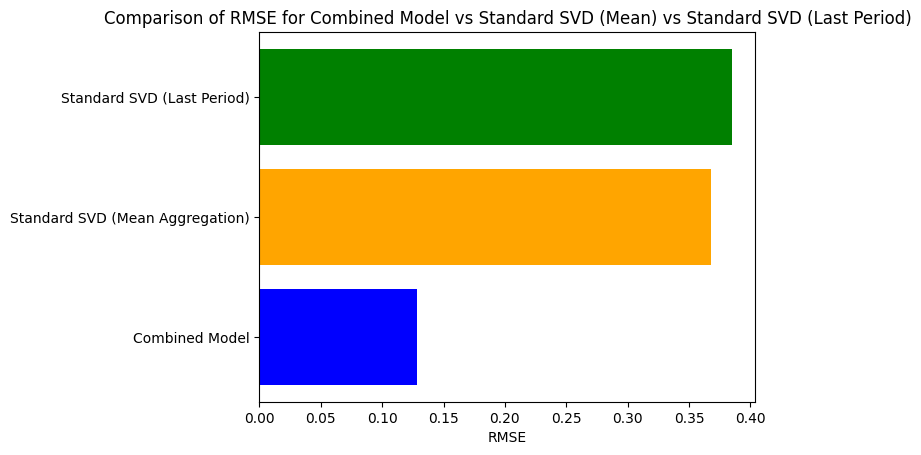

In [7]:
# Plot RMSE comparison for combined model, SVD (mean aggregation), and SVD (last period)
methods = ['Combined Model', 'Standard SVD (Mean Aggregation)', 'Standard SVD (Last Period)']
rmse_values = [rmse, baseline_rmse, baseline_rmse_last]

plt.barh(methods, rmse_values, color=['blue', 'orange', 'green'])
plt.xlabel('RMSE')
plt.title('Comparison of RMSE for Combined Model vs Standard SVD (Mean) vs Standard SVD (Last Period)')
plt.show()
